In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [89]:
women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('athletes-men.csv')
#women = women.drop(columns=['Name', 'Region'])
#women = women.drop([10])
women.head()
# missing = men.isnull().sum()
# print(missing)


,Name,rank,region,longitude,latitude,age,height,weight,run400,run5k,fran,candj,snatch,deadlift,backsq,pullups,coach,certification,multiple,howlong
0,KyleKasperbauer,1,North Central (Nebraska),-99.9018,41.4925,32,68,190,51,1132,124,345,285,508,508,71,1,1,1,2
1,NealMaddox,1,Northern California (San Jose),-121.8863,37.3382,37,70,205,61,1170,124,345,295,505,500,70,0,1,0,0
2,ScottPanchik,4,Central East (Ohio),-81.3396,41.6662,27,69,187,55,1230,124,325,265,505,425,65,0,0,0,0
3,NealMaddox,9,Northern California (San Jose),-120.8958,38.8375,37,70,205,61,1200,124,345,295,505,500,60,0,1,0,0
4,ZacharyForrest,11,South West (Nevada),-115.1398,36.1699,29,67,175,61,1200,124,315,250,475,410,54,1,1,1,2


In [99]:
from sklearn.preprocessing import scale
df = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X = scale(df)
X[0:10,]

array([[-7.76486798e-01, -4.46116726e-01, -1.36309095e+00,
         1.22142244e+00, -1.20552539e+00, -4.63642635e-01,
         4.30498755e-01],
       [-7.76486798e-01,  5.18902359e-02, -1.00485642e+00,
         1.12376328e+00, -1.20552539e+00, -7.66632917e-01,
         2.25775951e-01],
       [-6.32996453e-01, -9.44123687e-01, -4.39222957e-01,
         6.35467475e-01, -1.20552539e+00, -2.07818476e-01,
         4.39058645e-01],
       [-3.93845877e-01,  5.18902359e-02, -7.22039690e-01,
         1.47171672e-01, -1.20552539e+00, -7.52981851e-01,
         2.99661058e-01],
       [-2.98185647e-01, -7.44920903e-01, -7.22039690e-01,
        -4.38783292e-01, -1.20552539e+00, -6.73652684e-01,
         1.68202436e-01],
       [ 1.18454792e+00, -7.44920903e-01,  2.20682754e-01,
        -1.45805810e-01, -1.20552539e+00, -6.73652684e-01,
         1.68202436e-01],
       [-6.32996453e-01, -4.77111565e-02, -1.49978571e-02,
         1.47171672e-01, -1.17967398e+00, -7.01510232e-01,
        -2.0196248

In [145]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

In [146]:
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

Text(0.5, 1.0, 'K-Means Classification Pullups')

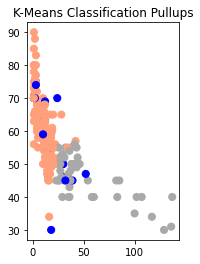

In [147]:
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

Text(0.5, 1.0, 'K-Means Classification Location')

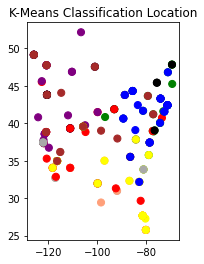

In [154]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
color_theme = np.array(['darkgray','lightsalmon', 'blue', 'red', 'green', 'yellow', 'purple', 'black', 'brown'])
clustering = KMeans(n_clusters=9,random_state=6)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

In [156]:
mask = (df['longitude'] >= -135) & (df['longitude'] <= -60) & (df['latitude'] >= 25) & (df['latitude'] <= 60)
df2 = df.loc[mask]
df2

,rank,age,run5k,pullups,fran,longitude,latitude
0,1,32,1132,71,124,-99.9018,41.4925
1,1,37,1170,70,124,-121.8863,37.3382
2,4,27,1230,65,124,-81.3396,41.6662
3,9,37,1200,60,124,-120.8958,38.8375
4,11,29,1200,54,124,-115.1398,36.1699
...,...,...,...,...,...,...,...
280,19,54,1347,50,170,-81.5158,27.6648
281,19,51,1260,55,203,-81.5158,27.6648
282,19,41,1241,55,339,-91.8318,37.9643
284,20,54,1344,55,188,-89.3985,40.6331


Text(0.5, 1.0, 'K-Means Classification Location')

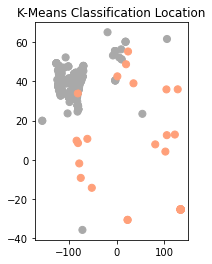

In [105]:
plt.subplot(1,2,2)
plt.scatter(x=df['longitude'],y=df['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Run5k')

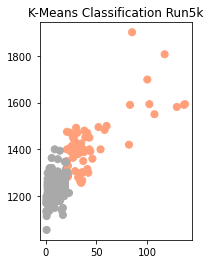

In [94]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

In [106]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

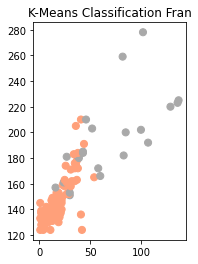

In [107]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

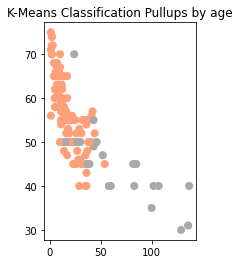

In [108]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

Text(0.5, 1.0, 'K-Means Classification Location')

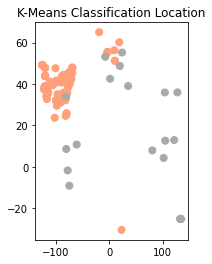

In [109]:
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Pullups')

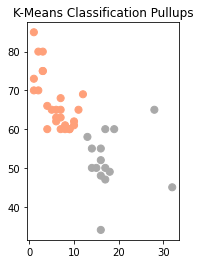

In [98]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')